# Projeto de Regressão Linear Bayesiana

Implementaremos um projeto de Machine Learning, gerando um modelo a partir da BAyesian Model-Building Interface (Bambi) em python.

## Bambi

Mas o que é a Bambi? 

Bambi é uma interface de construção de modelo Bayesiano. Trabalhando junto com os frameworks de programação probabilísticos PyMC, projetado para facilitar o ajuste dos modelos mistos Bayesianos comuns em biologia, ciência sociais dentre outras disciplinas.

## Dataset

Utilizaremos dados extraídos do artigo "CowNflow: A dataset on nitrogen flows and balances in dairy cows fed maize forage or herbage-based diets", do site https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8479390/, qual trata a dieta e as características dos animais têm um impacto significativo na eficiência do uso de nitrogênio (N) de vacas leiteiras.

In [ ]:
!pip install bambi pymc

In [2]:
import pymc as pm
import bambi as bmb
import pandas as pd
import arviz as az

In [3]:
df = pd.read_excel('/content/CowNflow_6_Cow_measurements_edited.xlsx')

In [4]:
df

,Cow_age__in_month,Body_weight__in_kg,Physiological_status,Lactation_week,Gestation_status,Gestation_week,Diet_type,"Forage_proportion_in_the_diet__in_kg_per_kg,_DM_basis","Maize_forage_proportion_in_the_diet__in_kg_per_kg,_DM_basis","Fresh_herbage_proportion_in_the_diet__in_kg_per_kg,_DM_basis",...,Urinary_N_concentration__in_g_per_kg,Urinary_urea_concentration__in_g_per_kg,Urinary_N_excretion__in_g_per_day,Urinary_urea_excretion__in_g_per_day,Basal_plasma_urea_concentration__in_mg_per_dL,Plasma_urea_concentration_3h_after_feeding__in_mg_per_dL,Plasma_urea_concentration4h_after_feeding__in_mg_per_dL,Plasma_urea_concentration_6h_after_feeding__in_mg_per_dL,N_balance__in_g_per_day,N_use_efficiency__in_milk_N_excretion__per__N_intake
0,104,519,lactating,32,pregnant,23,Fresh_herbage,1.000,0.000,1.0,...,4.3,NaN,176.0,NaN,NaN,NaN,NaN,NaN,16.3,0.217
1,89,517,lactating,31,pregnant,13,Fresh_herbage,1.000,0.000,1.0,...,6.5,NaN,209.0,NaN,NaN,NaN,NaN,NaN,4.5,0.217
2,32,474,lactating,26,not pregnant,0,Fresh_herbage,1.000,0.000,1.0,...,5.6,NaN,180.0,NaN,NaN,NaN,NaN,NaN,-21.8,0.284
3,105,538,lactating,34,pregnant,25,Fresh_herbage,1.000,0.000,1.0,...,3.2,NaN,139.0,NaN,NaN,NaN,NaN,NaN,62.7,0.183
4,89,529,lactating,33,pregnant,15,Fresh_herbage,1.000,0.000,1.0,...,4.0,NaN,148.0,NaN,NaN,NaN,NaN,NaN,36.5,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,42,545,lactating,24,pregnant,5,Maize,0.743,0.743,0.0,...,9.3,13.5,130.0,191.0,NaN,NaN,NaN,NaN,24.7,0.393
410,41,655,lactating,24,pregnant,15,Maize,0.743,0.743,0.0,...,4.7,7.1,172.0,265.0,NaN,NaN,NaN,NaN,-9.5,0.341
411,41,606,lactating,21,pregnant,14,Maize,0.743,0.743,0.0,...,6.5,9.5,149.0,221.0,NaN,NaN,NaN,NaN,2.2,0.389
412,33,663,lactating,21,not pregnant,0,Maize,0.743,0.743,0.0,...,8.0,11.9,142.0,215.0,NaN,NaN,NaN,NaN,0.5,0.389


## Analisando a produção diária de leite

In [5]:
df['Milk_production__in_kg_per_day'].describe()


count    402.000000
mean      23.830100
std        8.151307
min        5.500000
25%       18.275000
50%       24.150000
75%       29.350000
max       47.000000
Name: Milk_production__in_kg_per_day, dtype: float64

In [6]:
df['Milk_production__in_kg_per_day'].value_counts()

26.4    5
22.1    5
19.9    5
32.7    4
29.0    4
       ..
6.4     1
12.5    1
7.1     1
13.6    1
35.0    1
Name: Milk_production__in_kg_per_day, Length: 225, dtype: int64

## Analisando a Dieta em relação a produção diária

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib

import seaborn as sns

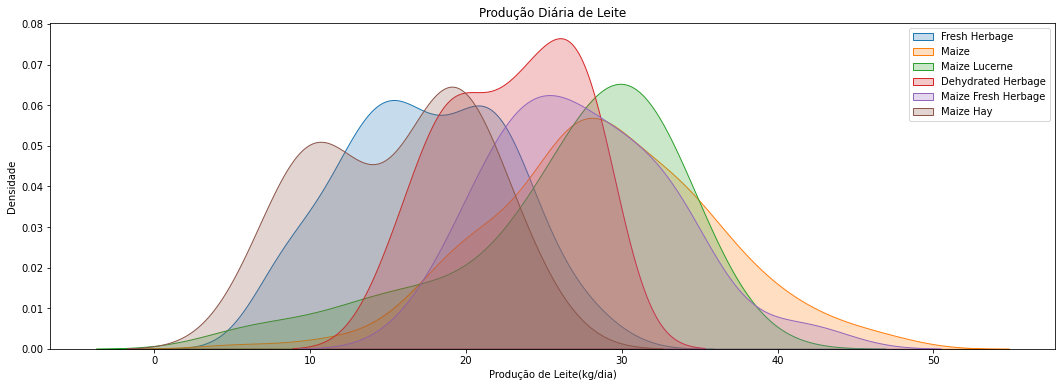

In [8]:
#Produção Diária por Tipo de Dieta
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (18, 6)

sns.kdeplot(df.loc[df['Diet_type'] == 'Fresh_herbage', 'Milk_production__in_kg_per_day'], label = 'Fresh Herbage', fill=True)
sns.kdeplot(df.loc[df['Diet_type'] == 'Maize', 'Milk_production__in_kg_per_day'], label = 'Maize', fill=True)
sns.kdeplot(df.loc[df['Diet_type'] == 'Maize_Lucerne', 'Milk_production__in_kg_per_day'], label = 'Maize Lucerne', fill=True)
sns.kdeplot(df.loc[df['Diet_type'] == 'Dehydrated_herbage', 'Milk_production__in_kg_per_day'], label = 'Dehydrated Herbage', fill=True)
sns.kdeplot(df.loc[df['Diet_type'] == 'Maize_Fresh_herbage', 'Milk_production__in_kg_per_day'], label = 'Maize Fresh Herbage', fill=True)
sns.kdeplot(df.loc[df['Diet_type'] == 'Maize_Hay', 'Milk_production__in_kg_per_day'], label = 'Maize Hay', fill=True)
plt.xlabel('Produção de Leite(kg/dia)'); plt.ylabel('Densidade'); plt.title('Produção Diária de Leite');
plt.legend()

## Criando o modelo Bambi

Modelo criado a partir do tipo da dieta e a concentração de N.

In [9]:
model = bmb.Model("Milk_production__in_kg_per_day ~ Diet_type + Diet_N_concentration__in_g_per_kg_DM", df, dropna=True)
fitted = model.fit()

Analisando o modelo criado

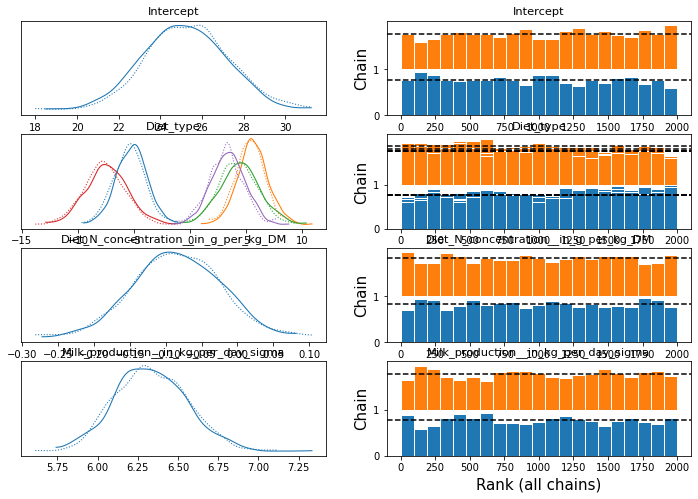

In [10]:
az.plot_trace(fitted, kind="rank_bars");

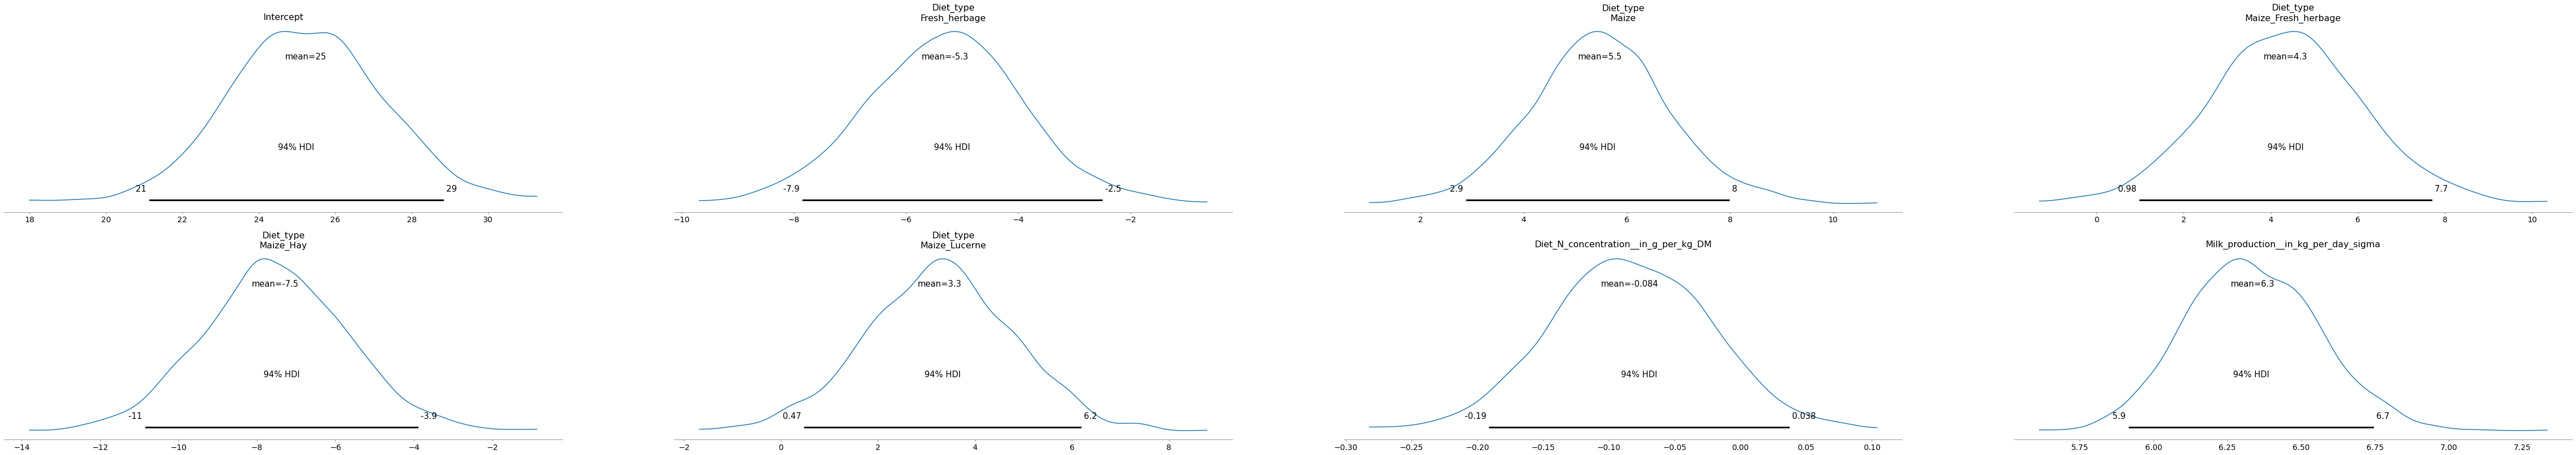

In [11]:
az.plot_posterior(fitted);

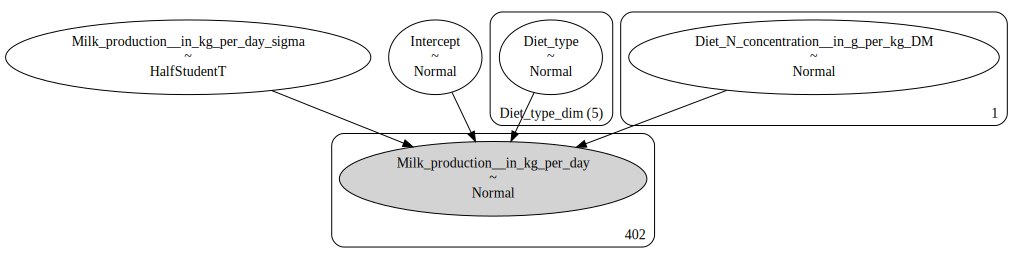

In [12]:
model.graph()

## Conclusão

Esse foi um exemplo simples de criação de modelo pelo Bambi. 

Mas podemos observar quantas possibilidades a mais poderiamos ter.

Esse exemplo, confecionado por mim, é somente de interesse didático.